In [200]:
import prophet as pt
import pandas as pd
import numpy as np
import yfinance as yf
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt
from prophet.plot import plot_plotly, plot_components_plotly, add_changepoints_to_plot


In [201]:
today = datetime.today().strftime('%Y-%m-%d')
data = yf.download(tickers="AAPL", start="2000-01-01", end=today, interval="1D")

[*********************100%***********************]  1 of 1 completed


In [202]:
data = data.reset_index()

In [203]:
df = pd.DataFrame(data=data[["Date", "Close"]])

In [204]:
df =df.rename(columns={"Date": "ds", "Close": "y"})

In [205]:
m = Prophet()
m.fit(df)

22:13:39 - cmdstanpy - INFO - Chain [1] start processing
22:13:41 - cmdstanpy - INFO - Chain [1] done processing


In [206]:
future = m.make_future_dataframe(periods=1095)

In [207]:
forecast = m.predict(future)

In [208]:
plot_plotly(m, forecast)

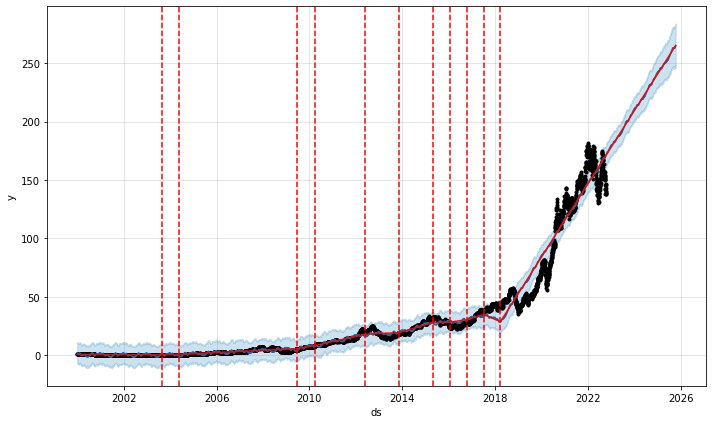

In [209]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)